# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Предоставлены данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyRegressor

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Импортируем данные.

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Ознакомимся с данными.

In [3]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [5]:
data_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [6]:
print(len(data_train))
print(len(data_test))

14149
5290


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

В тестовых данных отсутствуют колонки, характеризующие результаты обработки сырья.

Проверим данные на наличие дубликатов и пропущенных значений.

In [9]:
print(data_train.duplicated().sum())
print(data_test.duplicated().sum())

0
0


In [10]:
print(data_train.isna().sum())
print('---------------------------------')
print(data_test.isna().sum())

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64
---------------------------------
date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0

Так как все пропущенные данные - количественные, заполним все пропуски средними значениями.

In [11]:
# data_train = data_train.fillna(data_train.mean())
# data_test = data_test.fillna(data_test.mean())
# data_full = data_full.fillna(data_full.mean())
data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')
data_full = data_full.fillna(method='ffill')

In [12]:
print(data_train.isna().sum())
print('---------------------------------')
print(data_test.isna().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64
---------------------------------
date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatba

Проверим, правильно ли рассчитана эффективность обогащения.

In [13]:
def recovery(input_au, concentrate_au, tail_au):
    recovery = (concentrate_au * (input_au - tail_au)) / (input_au * (concentrate_au - tail_au)) * 100
    return recovery
recovery_predicted = recovery(data_train['rougher.input.feed_au'], data_train['rougher.output.concentrate_au'], data_train['rougher.output.tail_au'])
print(mean_absolute_error(data_train['rougher.output.recovery'], recovery_predicted))

9.73512347450521e-15


Значение средней абсолютной ошибки меньше единицы. Можно сделать вывод, что эффективность обогащения в предоставленных данных рассчитана правильно.

Данные проверены, обработаны и готовы к анализу.

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [14]:
print('Средняя доля золота в концентрате перед первым этапом очистки:', data_train['rougher.output.concentrate_au'].mean())
print('Средняя доля золота в концентрате после первого этапа очистки:', data_train['primary_cleaner.output.concentrate_au'].mean())
print('Средняя доля золота в концентрате после второго этапа очистки:', data_train['final.output.concentrate_au'].mean())

Средняя доля золота в концентрате перед первым этапом очистки: 19.43995785143646
Средняя доля золота в концентрате после первого этапа очистки: 32.386835978391346
Средняя доля золота в концентрате после второго этапа очистки: 44.00379162105571


In [15]:
print('Средняя доля серебра в концентрате перед первым этапом очистки:', data_train['rougher.output.concentrate_ag'].mean())
print('Средняя доля серебра в концентрате после первого этапа очистки:', data_train['primary_cleaner.output.concentrate_ag'].mean())
print('Средняя доля серебра в концентрате после второго этапа очистки:', data_train['final.output.concentrate_ag'].mean())

Средняя доля серебра в концентрате перед первым этапом очистки: 11.775812314356036
Средняя доля серебра в концентрате после первого этапа очистки: 8.200915815165981
Средняя доля серебра в концентрате после второго этапа очистки: 5.141920924857091


In [16]:
print('Средняя доля свинца в концентрате перед первым этапом очистки:', data_train['rougher.output.concentrate_pb'].mean())
print('Средняя доля свинца в концентрате после первого этапа очистки:', data_train['primary_cleaner.output.concentrate_pb'].mean())
print('Средняя доля свинца в концентрате после второго этапа очистки:', data_train['final.output.concentrate_pb'].mean())

Средняя доля свинца в концентрате перед первым этапом очистки: 7.664554751481546
Средняя доля свинца в концентрате после первого этапа очистки: 9.568544006770484
Средняя доля свинца в концентрате после второго этапа очистки: 10.132847758146394


*По данным рассчетам видно, что доля золота значительно увеличивается после каждого этапа очистки, доля свинца также увеличивается, но незначительно, а доля серебра уменьшается.*

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64


<AxesSubplot:>

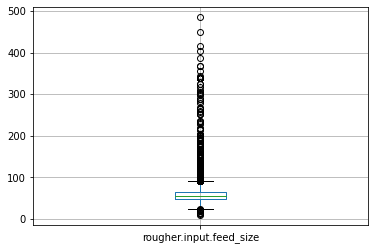

In [17]:
print(data_train['rougher.input.feed_size'].describe())
data_train.boxplot(column='rougher.input.feed_size')

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64


<AxesSubplot:>

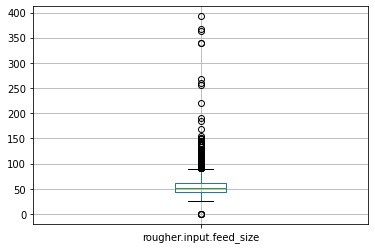

In [18]:
print(data_test['rougher.input.feed_size'].describe())
data_test.boxplot(column='rougher.input.feed_size')

По данным графикам видно, что распеределения размеров гранул сырья на тестовой выборке в среднем меньше, чем на обучающей. Однако, нельзя сказать, что эта разница значительна. Средний размер гранул отличается совсем не значительно (60 и 55).

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [19]:
print('Суммарная концентрация всех веществ в сырье:', data_train['rougher.input.feed_ag'].mean() + data_train['rougher.input.feed_pb'].mean() + data_train['rougher.input.feed_sol'].mean() + data_train['rougher.input.feed_au'].mean())
print('Суммарная концентрация всех веществ в черновом концентрате:', data_train['rougher.output.concentrate_ag'].mean() + data_train['rougher.output.concentrate_pb'].mean() + data_train['rougher.output.concentrate_sol'].mean() + data_train['rougher.output.concentrate_au'].mean())
print('Суммарная концентрация всех веществ в финальном концентрате:', data_train['final.output.concentrate_ag'].mean() + data_train['final.output.concentrate_pb'].mean() + data_train['final.output.concentrate_sol'].mean() + data_train['final.output.concentrate_au'].mean())

Суммарная концентрация всех веществ в сырье: 56.242169568286315
Суммарная концентрация всех веществ в черновом концентрате: 67.17314539700826
Суммарная концентрация всех веществ в финальном концентрате: 68.38787174692202


Посмотрим на распределение веществ в сырье.

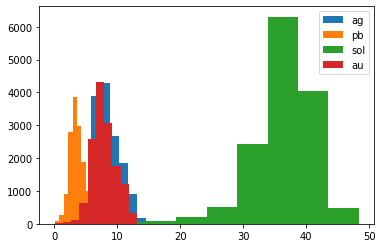

In [20]:
plt.hist(data_train['rougher.input.feed_ag'], label='ag')
plt.hist(data_train['rougher.input.feed_pb'], label='pb')
plt.hist(data_train['rougher.input.feed_sol'], label='sol')
plt.hist(data_train['rougher.input.feed_au'], label='au')
plt.legend()

Посмотрим на распределение веществ в черновом концентрате:

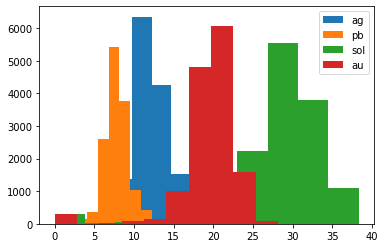

In [21]:
plt.hist(data_train['rougher.output.concentrate_ag'], label='ag')
plt.hist(data_train['rougher.output.concentrate_pb'], label='pb')
plt.hist(data_train['rougher.output.concentrate_sol'], label='sol')
plt.hist(data_train['rougher.output.concentrate_au'], label='au')
plt.legend()

Посмотрим на распределение веществ в финальном концентрате:

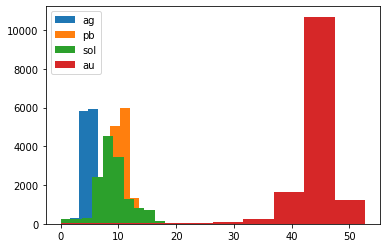

In [22]:
plt.hist(data_train['final.output.concentrate_ag'], label='ag')
plt.hist(data_train['final.output.concentrate_pb'], label='pb')
plt.hist(data_train['final.output.concentrate_sol'], label='sol')
plt.hist(data_train['final.output.concentrate_au'], label='au')
plt.legend()

**По данным графикам видно, как меняется доля всех веществ разных стадиях очистки, и как увеличивается концентрация золота.**

## Модель

In [23]:
data_test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

Выделим признаки и целевой признаки, масштабируем признаки. В качестве признаков будем использовать только те данные, которые есть и в обучающей, и в тестовой выборках.

In [24]:
features_list = ['primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level']
features_train = data_train[features_list]
target_train = data_train[['rougher.output.recovery', 'final.output.recovery']]
features_test = data_test[features_list]

scaler = StandardScaler()
scaler.fit(features_train[features_list])
features_train[features_list] = scaler.transform(features_train[features_list])
features_test[features_list] = scaler.transform(features_test[features_list])

Напишем функцию для вычисления итоговой sMAPE.

In [25]:
def total_smape(y_true,y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred))/2
    smape = ((numerator/denominator)*100).sum() / len(y_pred)
    return 0.25*smape[0] + 0.75*smape[1]

smape_scorer = make_scorer(total_smape, greater_is_better=False)

Создадим модель линейной регресси и прверим ее качество:

In [26]:
model = LinearRegression()
score = cross_val_score(model, features_train, target_train, scoring=smape_scorer, cv=5).mean()
print('Средняя оценка качества модели:', score)

Средняя оценка качества модели: -12.384596104847187


In [27]:
# # ячейка ревьюера

# import numpy as np

# def total_smape(y_true,y_pred):
#     numerator = np.abs(y_true - y_pred)
#     denominator = (np.abs(y_true) + np.abs(y_pred))/2
#     smape = ((numerator/denominator)*100).sum() / len(y_pred)
#     return 0.25*smape[0] + 0.75*smape[1]


# smape_scorer_new = make_scorer(total_smape, greater_is_better=False)

# model = LinearRegression()
# score = abs(cross_val_score(model, features_train, target_train, scoring=smape_scorer_new, cv=5, error_score="raise").mean())


# print('Средняя оценка качества модели:', score)


Посторим модель древа решений и подберем лучшие параметры:

In [28]:
model = DecisionTreeRegressor(random_state=12345)
GSCV = GridSearchCV(model, {'max_depth': list(range(1, 50))}, cv=5, scoring=smape_scorer)
GSCV.fit(features_train, target_train)
GSCV.best_estimator_

DecisionTreeRegressor(max_depth=5, random_state=12345)

Лучшая глубина для древа решений - 5. Проверим качество данной модели:

In [29]:
model = DecisionTreeRegressor(max_depth=5, random_state=12345)
score = cross_val_score(model, features_train, target_train, scoring=smape_scorer, cv=5).mean()
print('Средняя оценка качества модели:', score)

Средняя оценка качества модели: -10.952668842678056


Построим модель случайного леса и подберем лучшие параметры:

In [30]:
model = RandomForestRegressor(random_state=12345)
RSCV = RandomizedSearchCV(model, {'max_depth': list(range(1, 50)), 'n_estimators': list(range(1, 20))}, cv=5, scoring=smape_scorer)
RSCV.fit(features_train, target_train)
RSCV.best_params_

{'n_estimators': 17, 'max_depth': 6}

Лучшее количество деревьев для случайного леса - 3, глубина древа - 7. Проверим качество данной модели.

In [31]:
model = RandomForestRegressor(random_state=12345, n_estimators=3, max_depth=7)
score = cross_val_score(model, features_train, target_train, scoring=smape_scorer, cv=5).mean()
print('Средняя оценка качества модели:', score)

Средняя оценка качества модели: -11.883776950371168


**Наилучший результат показала модель дерева решений с максимальной глубиной дерева - 5. Проверим данную модель на тестовой выборке.**

Выделим целевой признак для тестовой выборки:

In [32]:
target_test = data_test.merge(data_full, how='left')
target_test = target_test[['rougher.output.recovery', 'final.output.recovery']]

Проверим модель:

In [33]:
model = DecisionTreeRegressor(max_depth=5, random_state=12345)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
smape = total_smape(target_test, predicted_test)
print('SMAPE тестовой выборки:', smape)

SMAPE тестовой выборки: 9.53956632407638


Результат тестовой выборки почти не отличается от результата тестовой. Модель прошла тестирование. Проверим модель на адекватность:

In [34]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(features_train, target_train)
predicted_test = dummy.predict(features_test)
smape = total_smape(target_test, predicted_test)
print(smape)

10.289630376021034


Результат выбранной модели лучше, чем результат случайной. Модель прошла проверку на адекватность.

**Финальный вывод**  
В рамках исследования были проанализированы данные с параметрами добычи и очистки сырья. Данные были обработаны, заполнены пропуски, проверны аномальные значения. Были построены и оценены несколько моделей для предсказания коэффициента восстановления золота из золотосодержащей руды. Выбрана лучшая модель - дерево решений максимальной глубиной дерева - 5.